# . Lab Exercise 6: RANSAC and Projective Transformations 
•	Objective: Implement RANSAC for homography estimation and projective transformations. 

•	Task: Use RANSAC to estimate the homography between two images, and then apply projective transformation to create a panorama or mosaic. 


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


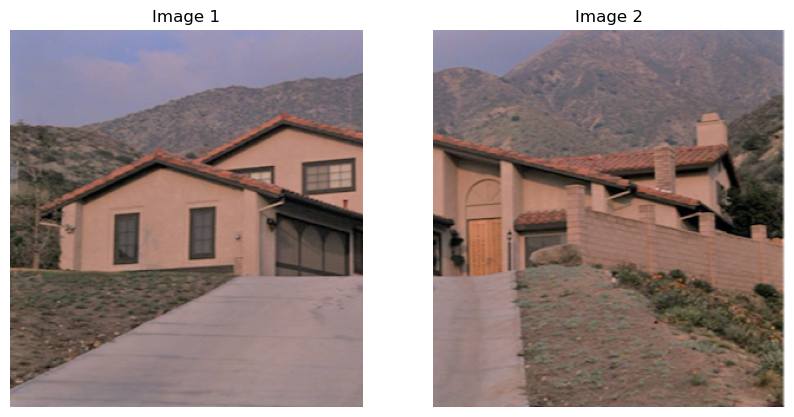

In [2]:
# Load the images
img1 = cv2.imread("./image1_crop1.jpg")  # Reference image
img2 = cv2.imread("./image1_crop2.jpg")  # Image to be transformed

# Convert images to grayscale for feature detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis('off')
plt.show()


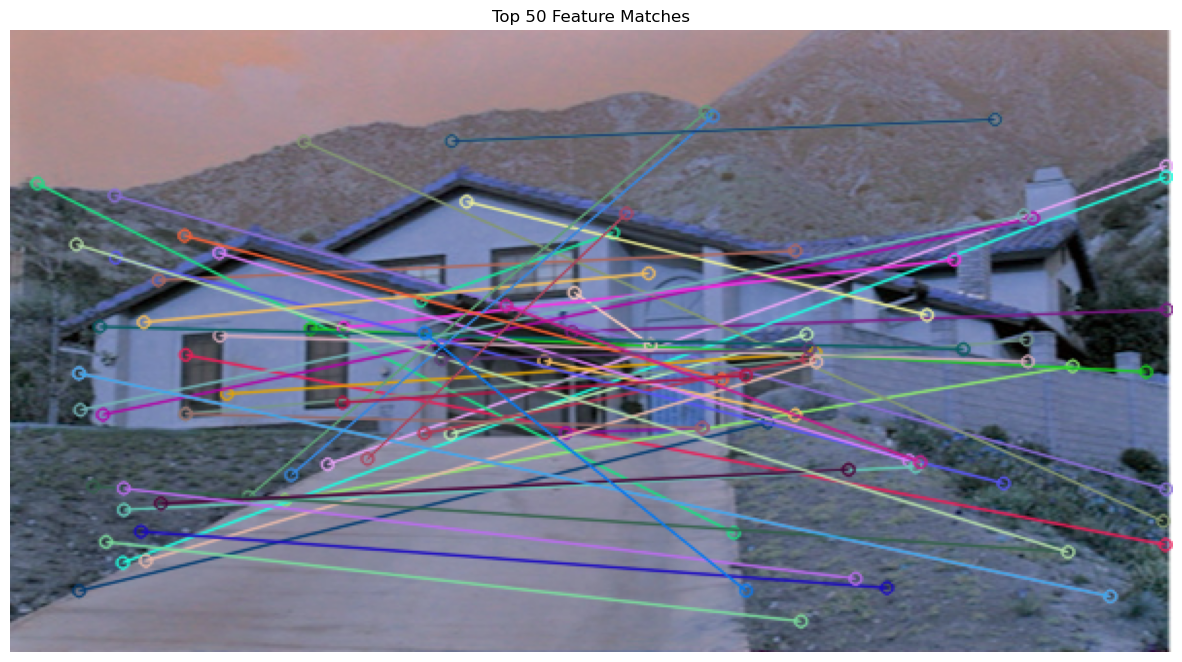

In [3]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Match descriptors using Brute-Force matcher with cross-check
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance

# Draw top matches for visualization
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(img_matches)
plt.title("Top 50 Feature Matches")
plt.axis('off')
plt.show()


In [4]:
# Extract matched keypoints
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography using RANSAC
homography_matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Matrix:\n", homography_matrix)


Homography Matrix:
 [[-1.77570710e+00 -1.03449754e-01  4.51722985e+01]
 [-1.23848263e+00 -1.63508873e+00  2.93249466e+02]
 [-1.11032460e-02 -4.21596787e-03  1.00000000e+00]]


In [5]:
# Increase or decrease the threshold as needed
homography_matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)
print("Updated Homography Matrix:\n", homography_matrix)


Updated Homography Matrix:
 [[ 6.66973116e-01 -2.81835508e+00  2.49827326e+02]
 [ 7.15089504e-01 -3.03891997e+00  2.68908587e+02]
 [ 2.68170233e-03 -1.13399472e-02  1.00000000e+00]]


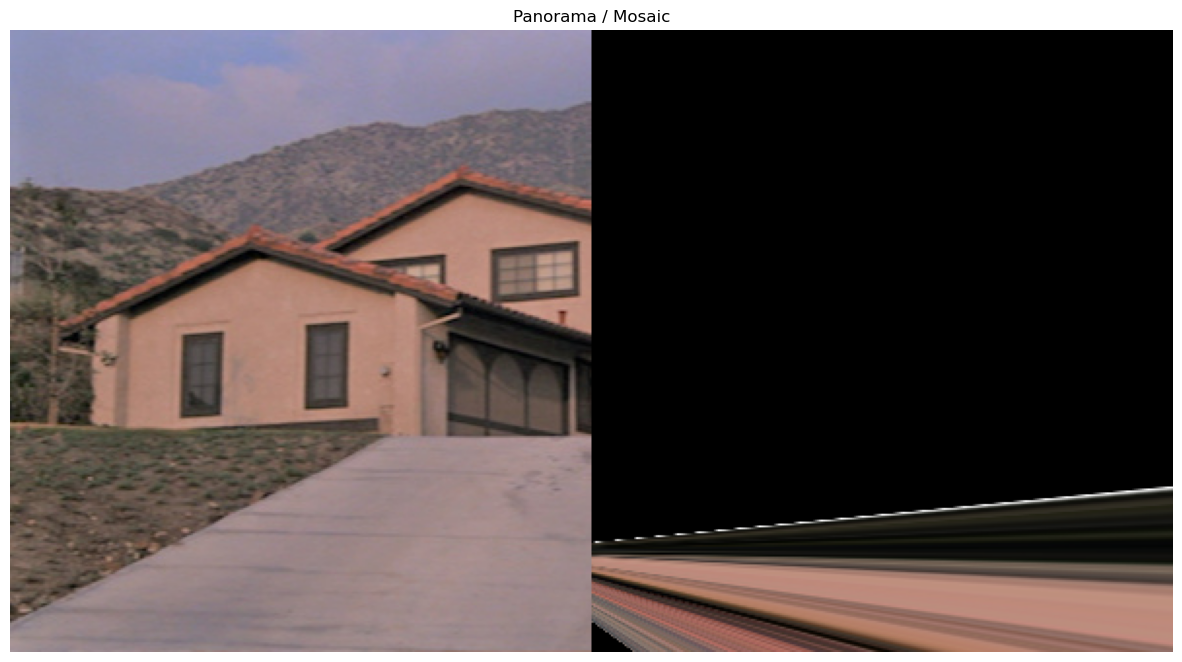

In [6]:
# Get dimensions for output panorama
height, width = img1.shape[:2]
warped_img2 = cv2.warpPerspective(img2, homography_matrix, (width * 2, height))

# Place img1 onto the warped image
warped_img2[0:height, 0:width] = img1

# Display the result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(warped_img2, cv2.COLOR_BGR2RGB))
plt.title("Panorama / Mosaic")
plt.axis('off')
plt.show()


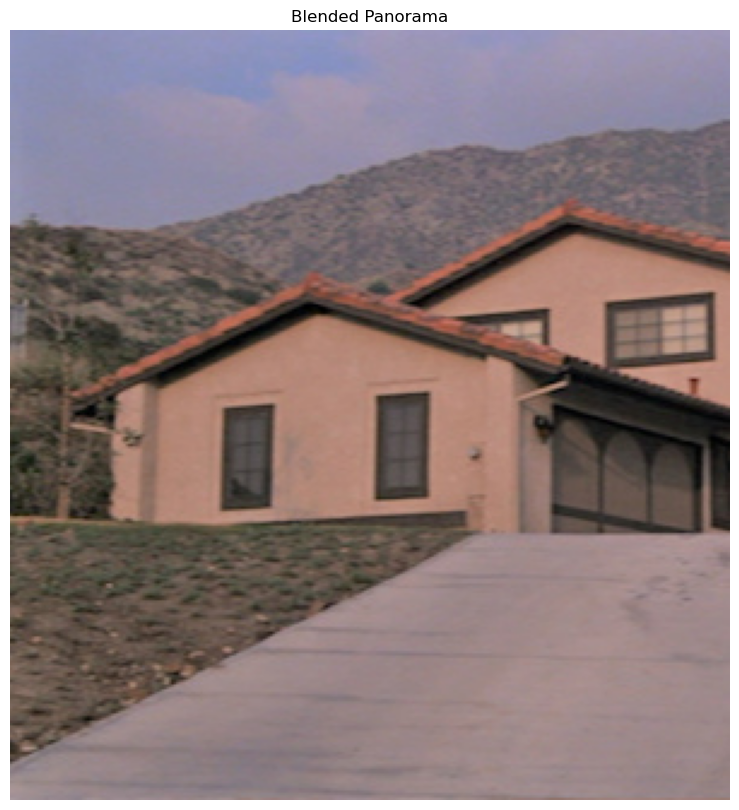

In [7]:
# Ensure warped_img2 and img1 have the same dimensions
height, width = img1.shape[:2]
warped_img2 = warped_img2[:height, :width]

# Create a mask for non-black pixels in warped_img2
non_black_pixels = (warped_img2 != 0).all(axis=2)  # Mask of non-black pixels

# Blend the overlapping regions
blended = cv2.addWeighted(img1, 0.5, warped_img2, 0.5, 0)  # Blend entire images

# Copy pixels from img1 where warped_img2 is black
warped_img2[~non_black_pixels] = img1[~non_black_pixels]

# Assign blended pixels to overlapping regions
warped_img2[non_black_pixels] = blended[non_black_pixels]

# Display the final panorama
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(warped_img2, cv2.COLOR_BGR2RGB))
plt.title("Blended Panorama")
plt.axis('off')
plt.show()


# Lab Exercise 6: RANSAC and Projective Transformations

## Objective
The objective of this lab exercise is to implement RANSAC for homography estimation and apply projective transformations to stitch two images together, creating a panorama or mosaic.

## Steps and Techniques

1. **Feature Detection and Matching**:
   - We used the SIFT algorithm to detect keypoints and descriptors in both images.
   - Brute-Force Matching was applied to find corresponding points between the two images based on feature descriptors.

2. **RANSAC for Homography Estimation**:
   - RANSAC (Random Sample Consensus) was used to estimate the homography matrix, filtering out outlier matches.
   - The homography matrix was computed based on the best inlier matches, providing a robust alignment for the transformation.

3. **Projective Transformation**:
   - Using the homography matrix, we applied a projective transformation to warp the second image to align it with the perspective of the first image.
   - The images were then combined to create a panorama, blending the overlapping regions.

## Results
- The final result is a stitched image (panorama/mosaic) that combines the two images into a single, unified view.
- RANSAC effectively filtered out outliers, allowing for accurate homography estimation and alignment.
- Projective transformation enabled perspective correction, providing a seamless panorama when images have overlapping regions.

## Conclusion
This lab demonstrates how RANSAC and projective transformations can be used to achieve robust image alignment and stitching. These techniques are fundamental in computer vision applications such as panoramic photography and augmented reality, where precise image matching and alignment are crucial.

---

### Notes
For improved results, images with ample overlap and distinct feature points yield better panoramas. Further refinements, like blending or smoothing, can enhance the quality of the final stitched image.
